In [17]:
import pandas as pd

# Load dataset
data = pd.read_csv(r"C:\Users\U Aravind\OneDrive\Documents\Datasets\Employee.csv")

# Display first few rows
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [19]:
# Summary statistics
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [9]:
# Check for missing values
print(data.isnull().sum())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


In [11]:
# Distribution of target variable (PaymentTier)
print(data['PaymentTier'].value_counts())

PaymentTier
3    3492
2     918
1     243
Name: count, dtype: int64


In [24]:
#Impute missing values
data.fillna({'EverBenched': 'No', 'ExperienceInCurrentDomain': 0}, inplace=True)

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encode binary variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Male=1, Female=0
data['EverBenched'] = label_encoder.fit_transform(data['EverBenched'])  # Yes=1, No=0

# One-hot encode multi-class variables
data = pd.get_dummies(data, columns=['Education', 'City'], drop_first=True)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'JoiningYear', 'ExperienceInCurrentDomain']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [30]:
X = data.drop(columns=['PaymentTier'])
y = data['PaymentTier']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.24778550071167507


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8367346938775511
              precision    recall  f1-score   support

           1       0.08      0.02      0.04        41
           2       0.67      0.73      0.70       185
           3       0.90      0.91      0.90       705

    accuracy                           0.84       931
   macro avg       0.55      0.56      0.55       931
weighted avg       0.82      0.84      0.83       931



In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean()}")

Cross-Validation Accuracy: 0.8188286384163174


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 10, 'n_estimators': 100}


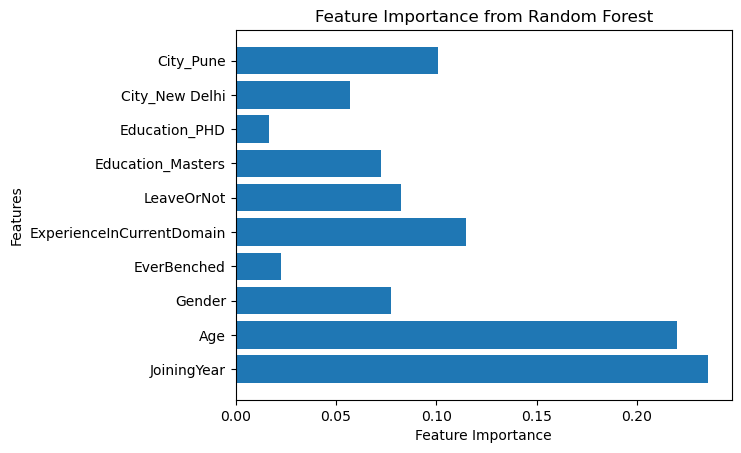

In [46]:
import matplotlib.pyplot as plt

# Plot feature importance
feature_importances = model.feature_importances_
features = X.columns
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()

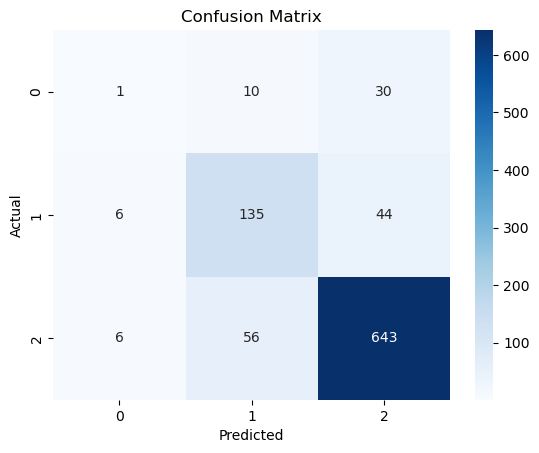

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [52]:
import joblib

# Save the model
joblib.dump(model, "salary_prediction_model.pkl")

# Load the model
loaded_model = joblib.load("salary_prediction_model.pkl")
loaded_model

RandomForestClassifier(random_state=42)